# Setup

In [21]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_ID = "clustering"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", PROJECT_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Get the Data

In [4]:
!ls ./datasets/

2017-10-25_BCDentists.csv  customer_den_20171114.txt  customer_den.sql	housing


In [5]:
import pandas as pd

cust = pd.read_csv('./datasets/2017-10-25_BCDentists.csv')

# Inspect Data

In [19]:
cust.head()

,lastname,firstname,nickname,districts,cdsbc_subclassidname,certifications,cdacerts,languages,contactid,City,...,Phone,Postal,Province,Address 1,Address 2,Address 3,Email,Gender,Grad Year,School
0,Abbas Zadeh Hassiri,Reza,Reza,Coquitlam,General Practitioner,NaN,NaN,NaN,fb8d6c4f-b8ed-df11-bc97-00155d026200,Coquitlam,...,604-552-8884,V3B 2P5,BC,118 - 2918 Glen Dr.,NaN,NaN,NaN,Male,2010.0,University of British Columbia
1,Abbasi,Shabnam,NaN,NaN,General Practitioner,NaN,NaN,NaN,1a2edb67-2fe3-e611-8125-00155d02616e,NaN,...,778-322-2617,NaN,NaN,NaN,NaN,NaN,shabnam061@yahoo.com,Female,2017.0,Shaheed Beheshti University
2,Abbey,Robin,Simon,NaN,Certified Specialist,Endodontics,NaN,French,8ef00215-b4ed-df11-bc97-00155d026200,NaN,...,604-345-5834,NaN,NaN,NaN,NaN,NaN,rsimonabbey@gmail.com,Male,2017.0,University of British Columbia
3,Abd El Latif,Amr,Amr,Vancouver,General Practitioner,NaN,NaN,NaN,c5511ec1-b8ed-df11-bc97-00155d026200,Vancouver,...,604-684-1742,V6Z 1G3,BC,1015 - 736 Granville Street,NaN,NaN,NaN,Male,1989.0,Cairo University
4,Abdel Rahman,Basant,Basant,Burnaby,General Practitioner,NaN,NaN,"Arabic, French, German",d12fcfc1-6e7d-e311-afa0-00155d02613e,Burnaby,...,604-782-1765,V5C 5T1,BC,210-1899 Willingdon Ave,NaN,NaN,baly@telus.net,Female,2013.0,Alexandria University


In [12]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3862 entries, 0 to 3861
Data columns (total 23 columns):
lastname                3862 non-null object
firstname               3862 non-null object
nickname                3402 non-null object
districts               3588 non-null object
cdsbc_subclassidname    3862 non-null object
certifications          499 non-null object
cdacerts                171 non-null object
languages               1809 non-null object
contactid               3862 non-null object
City                    3576 non-null object
Fax                     2313 non-null object
Latitude                3406 non-null float64
Longitude               3406 non-null float64
Phone                   3731 non-null object
Postal                  3561 non-null object
Province                3528 non-null object
Address 1               3565 non-null object
Address 2               252 non-null object
Address 3               30 non-null object
Email                   1783 non-null obj

In [40]:
cust.describe()

,Latitude,Longitude,Grad Year
count,3406.000000,3406.000000,3829.000000
mean,49.302731,-122.948969,1997.170279
std,1.607651,3.572653,13.997247
min,0.000000,-132.095199,1955.000000
25%,49.115295,-123.343281,1986.000000
50%,49.226345,-123.115821,1998.000000
75%,49.272543,-122.858280,2010.000000
max,62.833000,0.000000,2019.000000


In [17]:
cust['districts'].value_counts()

 Vancouver                                                                      726
 Victoria                                                                       452
 Surrey                                                                         241
 Burnaby                                                                        176
 Richmond                                                                       157
 Nanaimo                                                                        132
 North Vancouver                                                                117
 Coquitlam                                                                       91
 Langley                                                                         75
 Abbotsford                                                                      71
 Delta                                                                           66
 Prince George                                                              

In [52]:
cust['Province'].value_counts()

BC    3444
ON      22
AB      22
WA       9
CA       6
NS       3
IL       2
NT       2
SK       2
MB       2
MA       2
QC       1
ID       1
VA       1
DC       1
NY       1
NJ       1
NL       1
TX       1
YT       1
AZ       1
MD       1
HI       1
Name: Province, dtype: int64

In [18]:
cust['cdsbc_subclassidname'].value_counts() 

General Practitioner                      3078
Certified Specialist                       425
Non-Practising                             127
Limited (post-graduate)                     73
Limited (education)                         45
Restricted to Specialty                     39
Limited (volunteer)                         21
Limited (student practitioner)              19
Limited (armed services or government)      19
Academic (Grandparented)                     8
Suspended                                    4
Limited (research)                           2
Academic                                     2
Name: cdsbc_subclassidname, dtype: int64

In [34]:
cust['School'].value_counts() 

University of British Columbia                 1370
University of Alberta                           290
University of Toronto                           195
University of Manitoba                          195
University of Western Ontario                   151
McGill University                               140
University of Saskatchewan                      123
Dalhousie University                            118
UBC                                             112
Boston University                                56
Loma Linda University                            37
University of Sydney                             34
Case Western Reserve University                  28
University of Southern California                28
Tehran University Medical Sciences & Health      27
New York University                              23
New York                                         21
Shahid Beheshti University                       20
Islamic Azad University                          19
University o

In [38]:
cust['Gender'].value_counts() 

Male      2515
Female    1347
Name: Gender, dtype: int64

In [39]:
cust['languages'].value_counts() 

 Cantonese                                        195
 Cantonese, Mandarin                              153
 French                                           144
 Farsi                                            110
 Hindi, Punjabi                                    91
 Mandarin                                          83
 Punjabi                                           74
 Korean                                            73
 Mandarin, Taiwanese                               47
 Arabic                                            41
 German                                            39
 Spanish                                           37
 Hindi, Punjabi, Urdu                              33
 Farsi, Persian                                    27
 Vietnamese                                        19
 Polish                                            19
 Italian                                           19
 Filipino, Tagalog                                 17
 Afrikaans                  

# Visualize

Saving figure attribute_histogram_plots


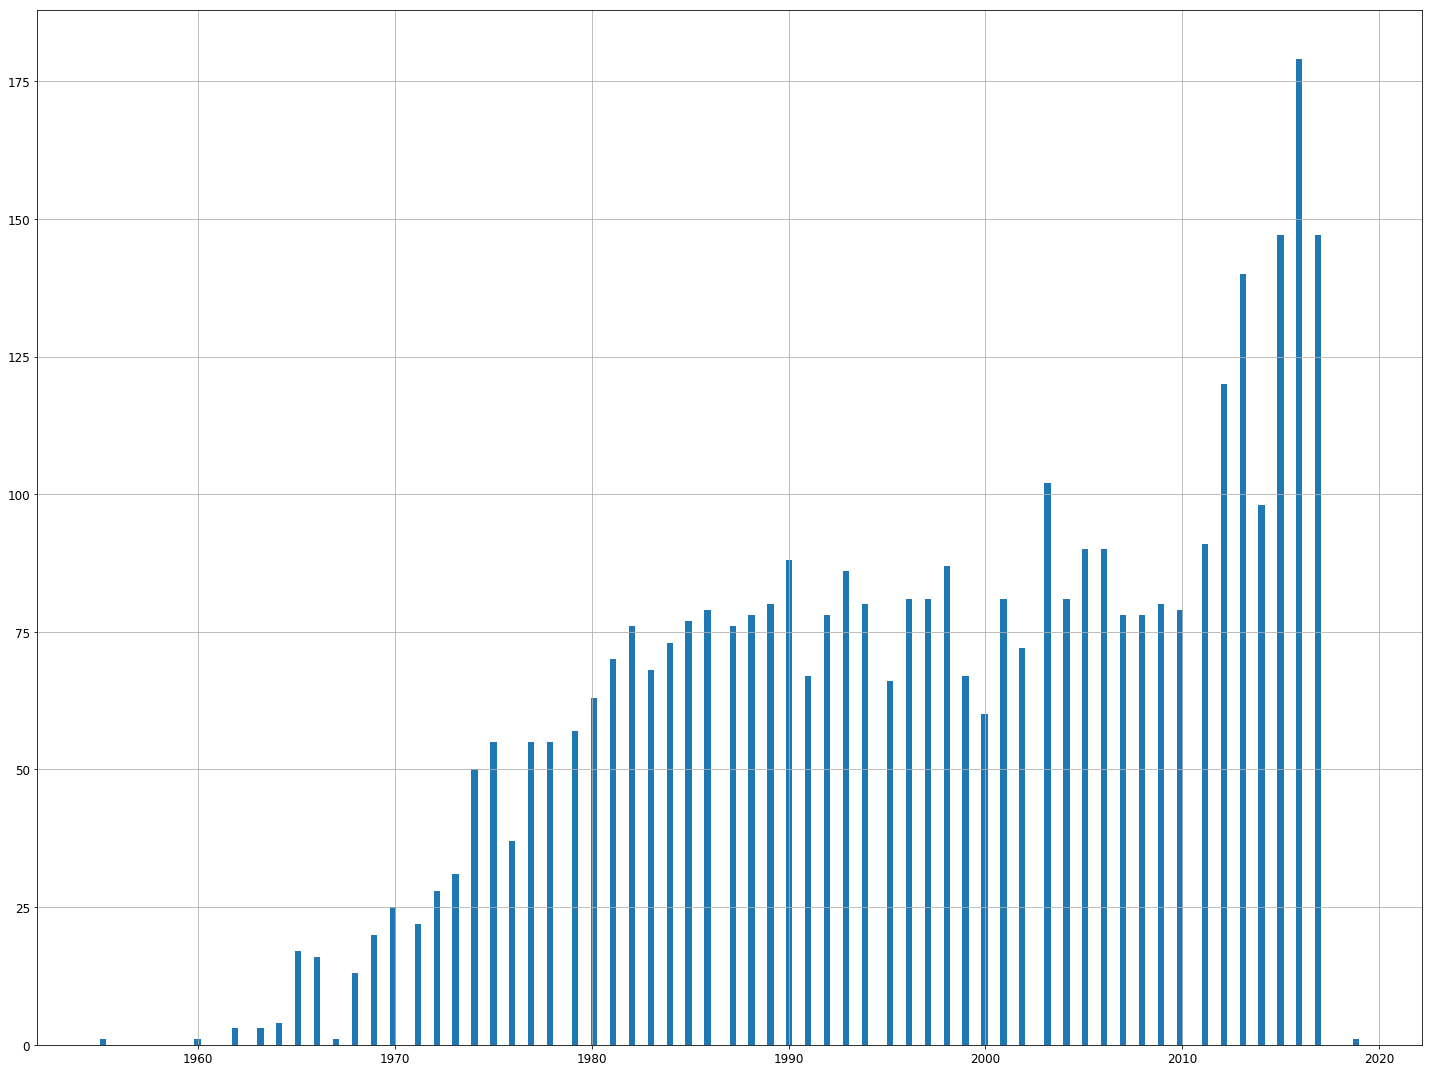

In [33]:
cust['Grad Year'].hist(bins=200,figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()


Saving figure better_visualization_plot


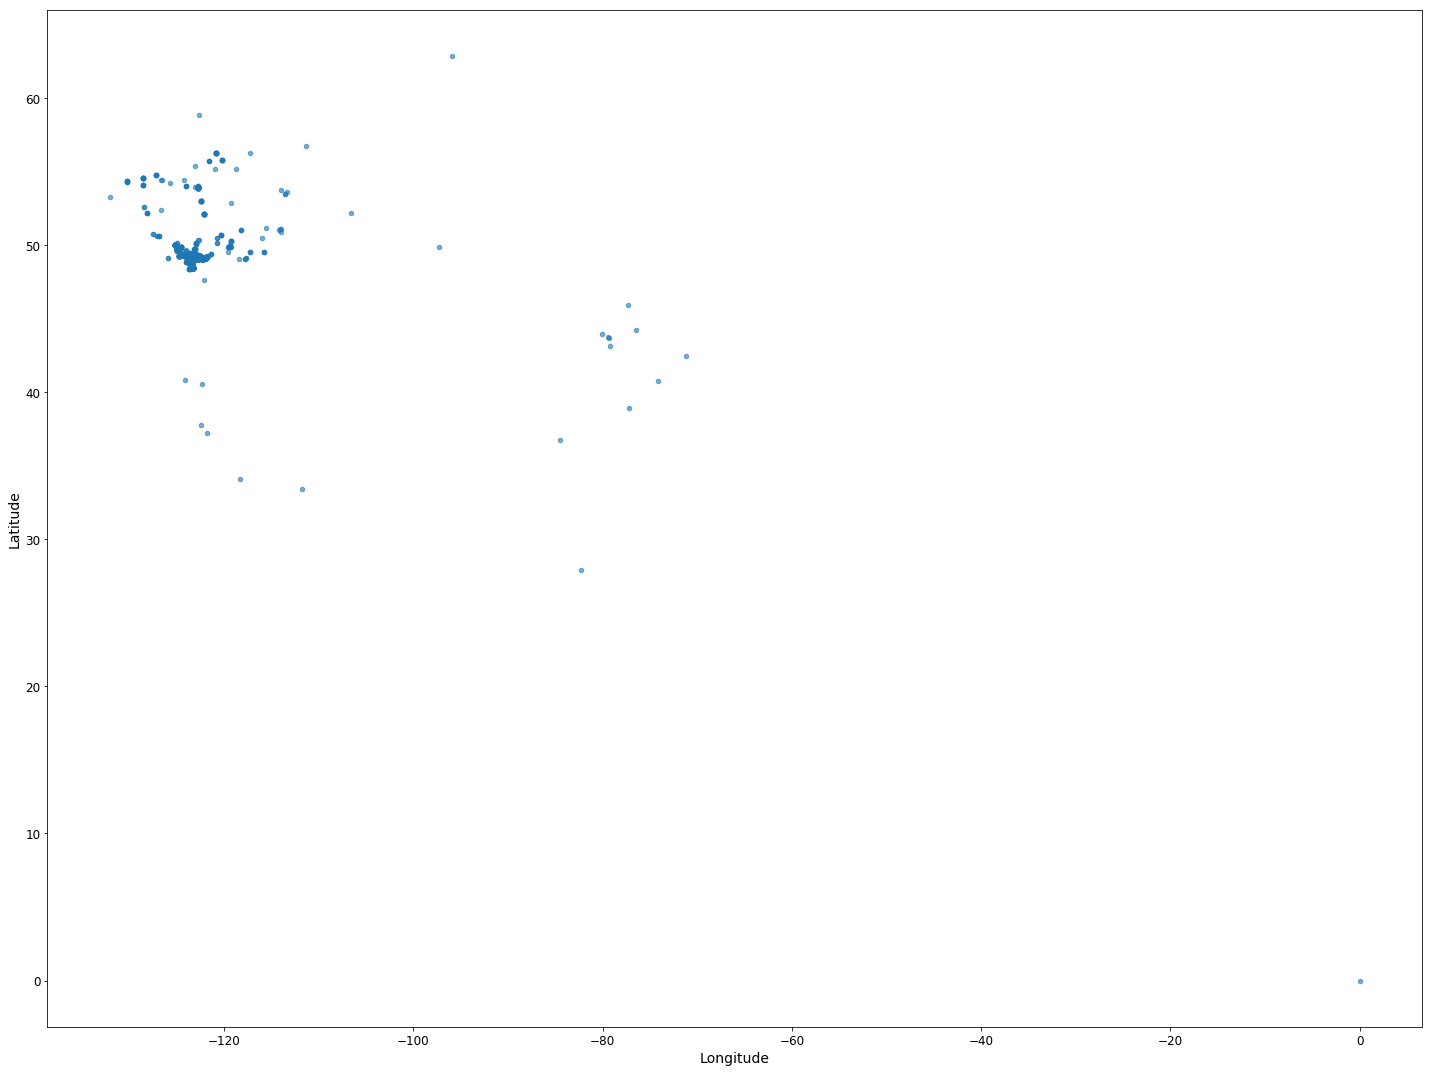

In [50]:
cust.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.6, figsize=(20,15))
save_fig("better_visualization_plot")

Saving figure scatter_matrix_plot


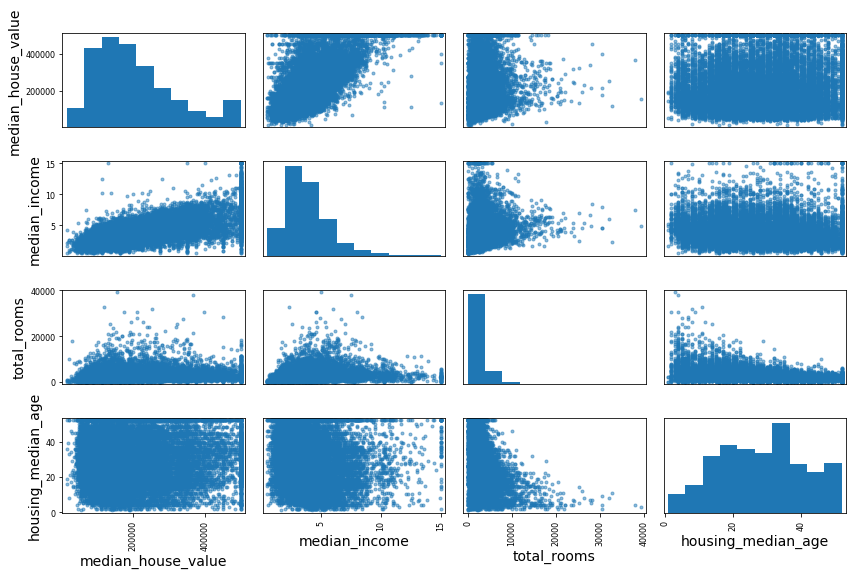

In [35]:
from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
# from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

In [ ]:
Ideas

https://en.wikipedia.org/wiki/Market_segmentation


1. frequency of perchase vs spend dollars
1. top 15 - scatter
1. geograpy
histograms